In [6]:
import pandas as pd
df = pd.read_excel('EastWestAirlines.xlsx')


In [7]:
print(df.isnull().sum())  # This will show any columns with missing values


East-West Airlines is trying to learn more about its customers.  Key issues are their     8
Unnamed: 1                                                                               13
Unnamed: 2                                                                               20
Unnamed: 3                                                                               13
Unnamed: 4                                                                                8
dtype: int64


In [8]:
# Select only numeric columns for IQR calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter rows to remove outliers from the original DataFrame based on numeric columns
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [9]:
import pandas as pd

df = pd.read_excel('EastWestAirlines.xlsx')

df = df.apply(pd.to_numeric, errors='coerce')

numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.head())  # Verify the numeric data

numeric_df = numeric_df.dropna(axis=1, how='all')

from sklearn.preprocessing import StandardScaler

if not numeric_df.empty:
    scaler = StandardScaler()
    scaled_numeric_df = scaler.fit_transform(numeric_df)
    scaled_numeric_df = pd.DataFrame(scaled_numeric_df, columns=numeric_df.columns, index=df.index)

    # Re-join with non-numeric data
    df_scaled = pd.concat([scaled_numeric_df, df.select_dtypes(exclude=['number'])], axis=1)
    print("Data scaled successfully.")
else:
    print("No numeric columns available to scale.")


   East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0                                                NaN                                       
1                                                NaN                                       
2                                                NaN                                       
3                                                NaN                                       
4                                                NaN                                       

   Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  
Data scaled successfully.


In [10]:
print(df.describe())


       East-West Airlines is trying to learn more about its customers.  Key issues are their  \
count                                                0.0                                       
mean                                                 NaN                                       
std                                                  NaN                                       
min                                                  NaN                                       
25%                                                  NaN                                       
50%                                                  NaN                                       
75%                                                  NaN                                       
max                                                  NaN                                       

       Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  
count         0.0    5.000000         0.0         0.0  
mean          NaN    3.

array([[<Axes: title={'center': 'East-West Airlines is trying to learn more about its customers.  Key issues are their'}>,
        <Axes: title={'center': 'Unnamed: 1'}>],
       [<Axes: title={'center': 'Unnamed: 2'}>,
        <Axes: title={'center': 'Unnamed: 3'}>],
       [<Axes: title={'center': 'Unnamed: 4'}>, <Axes: >]], dtype=object)

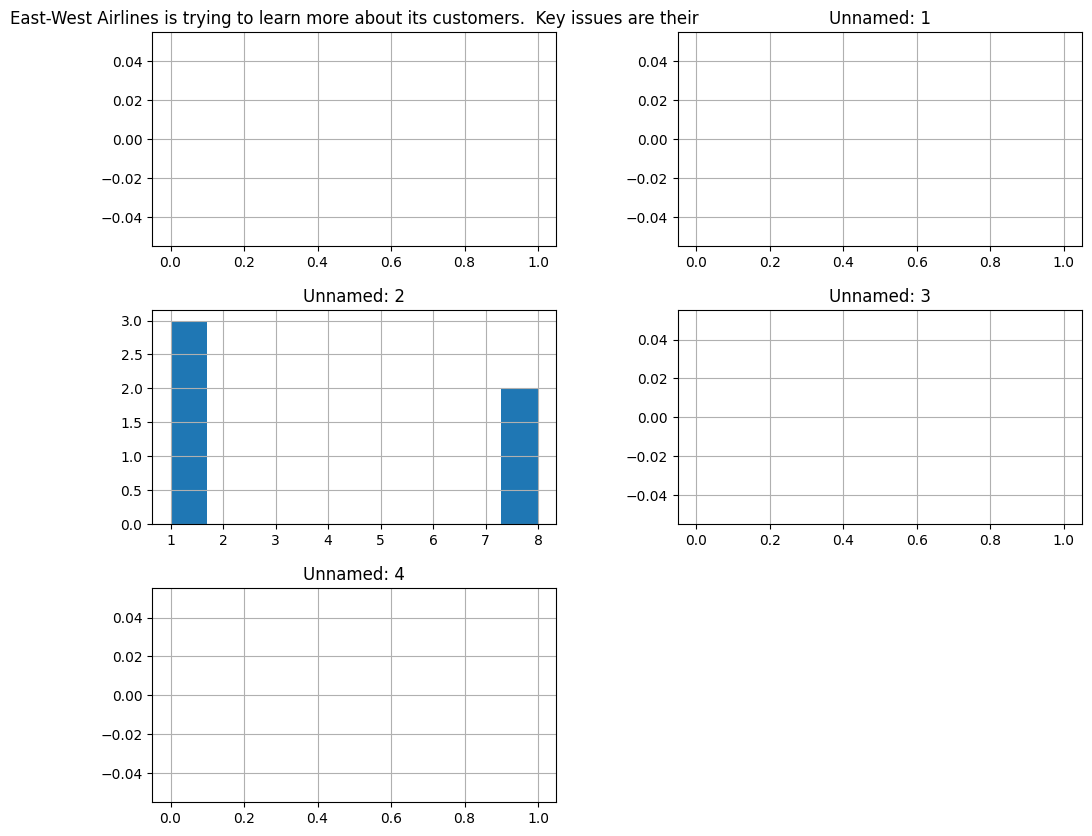

In [11]:
df.hist(figsize=(12, 10))


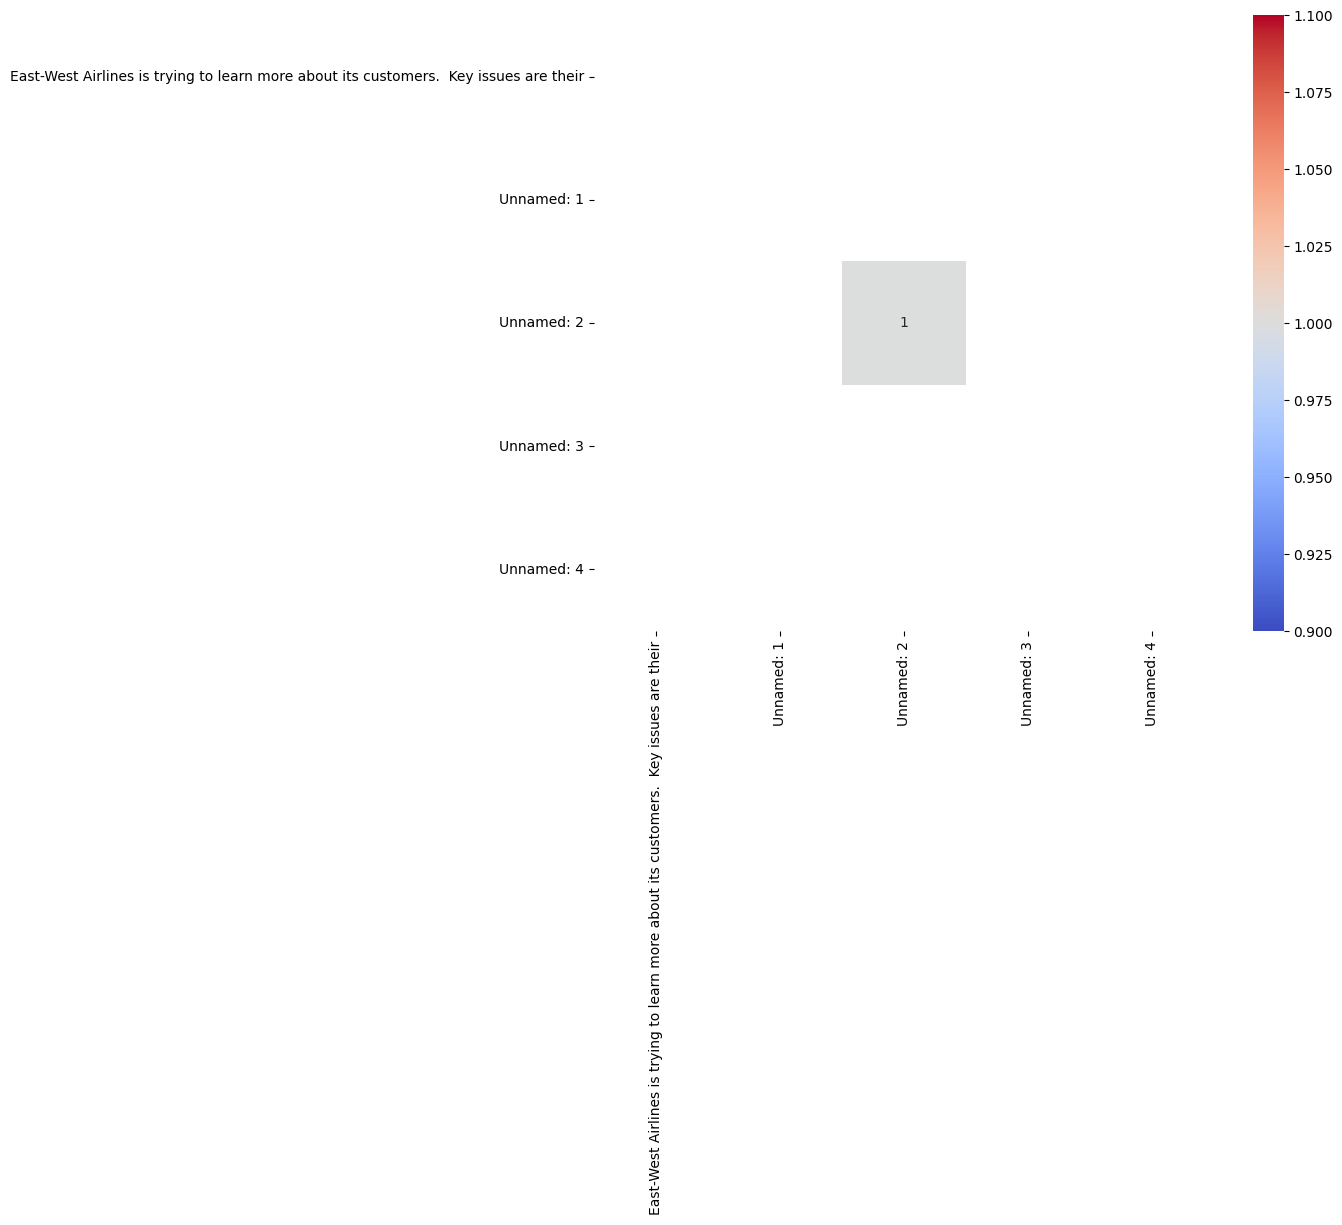

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [14]:
print(df_scaled.isnull().sum())  # Shows the number of NaNs in each column

df_scaled.fillna(df_scaled.mean(), inplace=True)  # Replace NaNs with column means

df_scaled.dropna(inplace=True)  # Remove rows with any NaN values


Unnamed: 2    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

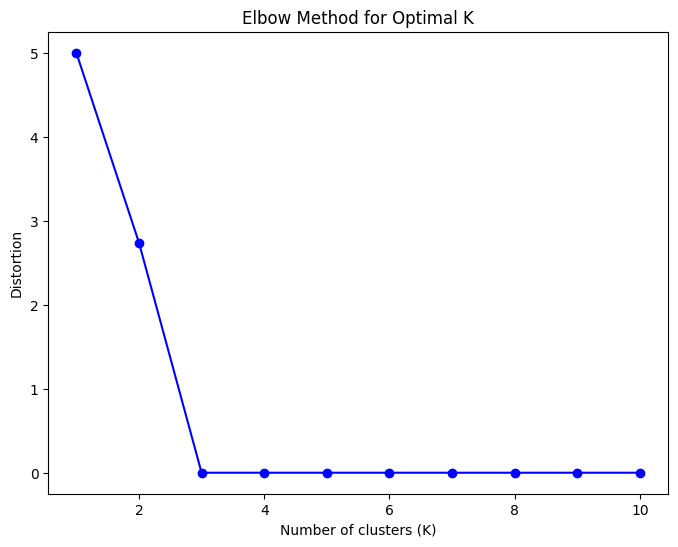

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Now df_scaled should be free of NaNs
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()


In [16]:
optimal_k = 3  # Assuming 3 clusters based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)  # Use 'df_scaled' here instead of 'scaled_df'



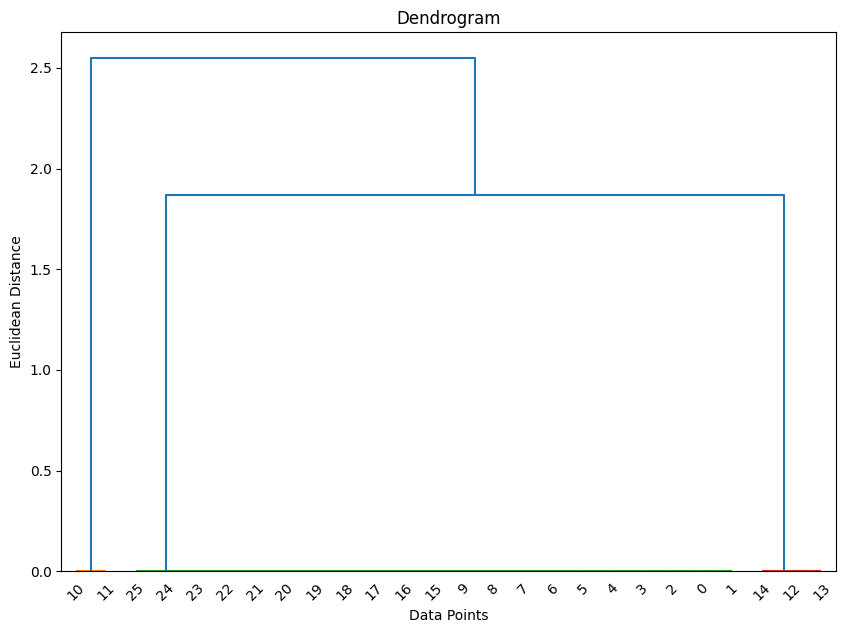

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [18]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(df_scaled)


In [19]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(df_scaled)


In [20]:
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels
df['DBSCAN_Cluster'] = dbscan_labels

# View cluster characteristics for K-Means
print(df.groupby('KMeans_Cluster').mean())


                East-West Airlines is trying to learn more about its customers.  Key issues are their  \
KMeans_Cluster                                                                                          
0                                                             NaN                                       
1                                                             NaN                                       
2                                                             NaN                                       

                Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
KMeans_Cluster                                                   
0                      NaN         NaN         NaN         NaN   
1                      NaN         8.0         NaN         NaN   
2                      NaN         1.0         NaN         NaN   

                Hierarchical_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                        
0                                

In [21]:
import matplotlib.pyplot as plt


In [24]:
print(df_scaled.shape)
print(df_scaled.columns)


(26, 1)
Index(['Unnamed: 2'], dtype='object')


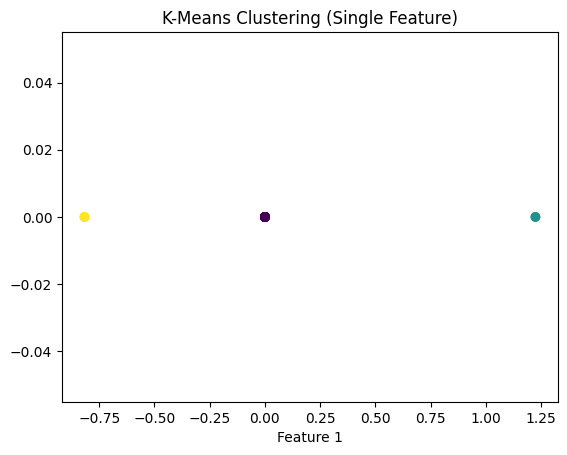

In [25]:
plt.scatter(df_scaled.values[:, 0], [0] * len(df_scaled), c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering (Single Feature)')
plt.xlabel('Feature 1')  # Replace with the actual column name, if needed
plt.show()


In [35]:
print("Shape of df_scaled:", df_scaled.shape)
print("Columns in df_scaled:", df_scaled.columns)


Shape of df_scaled: (26, 1)
Columns in df_scaled: Index(['Unnamed: 2'], dtype='object')


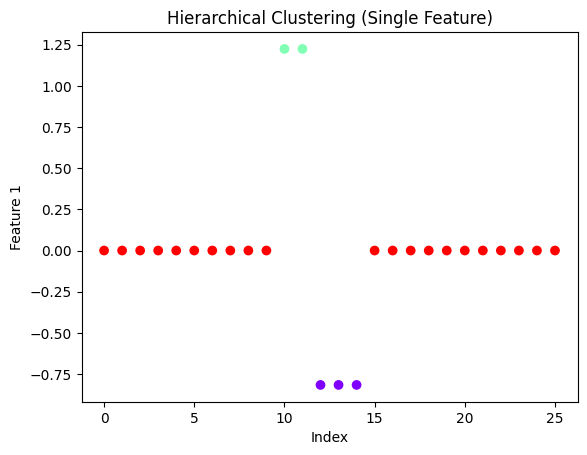

In [36]:
plt.scatter(df_scaled.index, df_scaled.values[:, 0], c=hierarchical_labels, cmap='rainbow')
plt.title('Hierarchical Clustering (Single Feature)')
plt.xlabel("Index")
plt.ylabel("Feature 1")  # Replace with the actual feature name
plt.show()


Shape of df_scaled: (26, 1)
Columns in df_scaled: Index(['Unnamed: 2'], dtype='object')


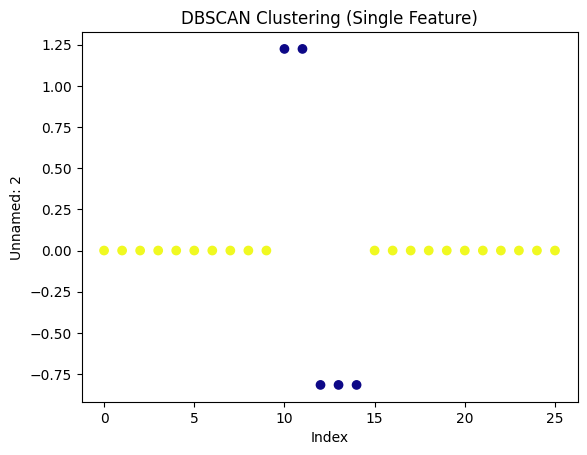

In [39]:
import matplotlib.pyplot as plt

# Check the number of columns in df_scaled
print("Shape of df_scaled:", df_scaled.shape)
print("Columns in df_scaled:", df_scaled.columns)

# Adjust the plotting code based on the column count
if df_scaled.shape[1] >= 2:
    # If there are at least two columns, plot the first two features
    plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=dbscan_labels, cmap='plasma')
    plt.title('DBSCAN Clustering')
    plt.xlabel(df_scaled.columns[0])  # First feature name
    plt.ylabel(df_scaled.columns[1])  # Second feature name
    plt.show()
elif df_scaled.shape[1] == 1:
    # If there's only one column, plot it against the index
    plt.scatter(df_scaled.index, df_scaled.values[:, 0], c=dbscan_labels, cmap='plasma')
    plt.title('DBSCAN Clustering (Single Feature)')
    plt.xlabel("Index")
    plt.ylabel(df_scaled.columns[0])  # The name of the single feature
    plt.show()
else:
    print("Not enough features to plot.")


In [41]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores using df_scaled instead of scaled_df
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')


K-Means Silhouette Score: 1.0
DBSCAN Silhouette Score: 0.7692307692307693
